# Network Analysis and Web Knownledge Mining

##                                                  HW2

# Import packages needed


In [230]:
import community as community_louvain
from collections import defaultdict
import matplotlib.cm as cm
import networkx as nx
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
import scipy.cluster.hierarchy as hierarchy
%matplotlib inline

In [74]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [26]:
dir(nx)

['AmbiguousSolution',
 'DiGraph',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'LFR_benchmark_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'OrderedDiGraph',
 'OrderedGraph',
 'OrderedMultiDiGraph',
 'OrderedMultiGraph',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 '__author__',
 '__bibtex__',
 '__builtins__',
 '__cached__',
 '__date__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adj_matrix',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_connectivity',
 

In [172]:
def modularity(G, partition):
    m = G.number_of_edges()
    
    degree = G.degree()
    norm = 1.0/(2.0*m)
    
    Q = 0.0
    for c in partition:
        for u, v in it.product(c, repeat=2):
            w = 1 if G.has_edge(u, v) else 0
            #  double count self loop
            if u == v:
                w *= 2.0
            Q += w - degree[u] * degree[v] * norm
    return norm*Q

In [178]:
def girvan_newman(G):
    """ run the algorithm of Girvan + Newman up to the first separation
        and return list of components of G, list of edges removed
    """
    
    # we're going to remove edges, so do it on a copy of the original graph
    G = G.copy()
    
    def find_best_edge(G0):
        """ get the edge from G0 with highest betweenness centrality"""
        eb = nx.edge_betweenness_centrality(G0)
        edges = eb.keys()
        return max(edges, key=lambda e: eb[e])

    removed_edges = []
    # Proceed until we separate the graph
    while nx.number_connected_components(G) == 1:
        u, v = find_best_edge(G)
        G.remove_edge(u, v)
        removed_edges.append((u, v))

    return list(nx.connected_components(G)), removed_edges

## Read Data from files

In [5]:
H1 = nx.read_gml("adjnoun/adjnoun.gml")
H2 = nx.read_gml("polbooks/polbooks.gml")

# these lines reads a graph from Geographic Markdown Lang

### Plot Graph H1 words clustering

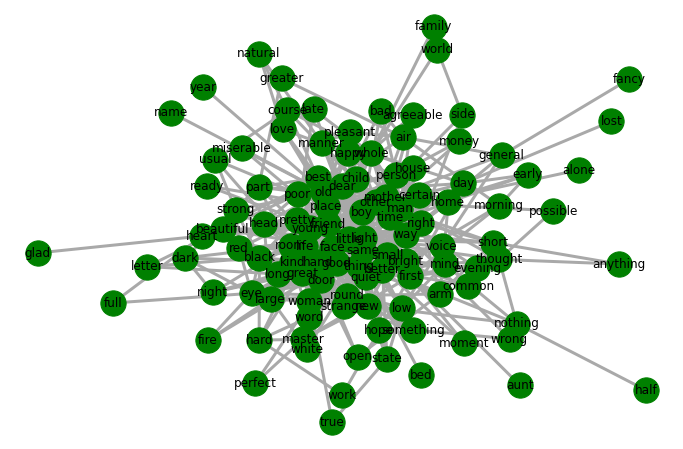

In [122]:
pos1 = nx.spring_layout(H1)

plt.figure(figsize=(12,8))
nx.draw_networkx(H1, pos=pos1, node_color='green', edge_color='darkgray', width=3, node_size=640)
limits = plt.axis('off')

### Plot Graph H2 books - 3clusters

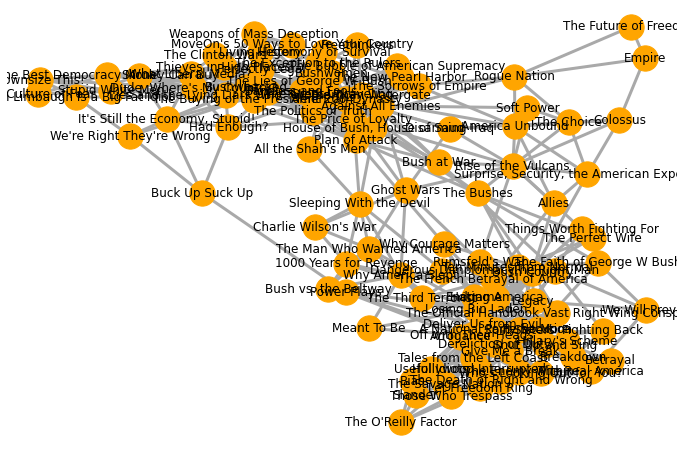

In [121]:
pos2 = nx.spring_layout(H2)

plt.figure(figsize=(12,8))
nx.draw_networkx(H2, pos=pos2, node_color='orange', edge_color='darkgray', width=3, node_size=640)
limits = plt.axis('off')

## A.| Extract k-cliques from each graph

In [129]:
# get the 2-cliques for graph 1 adjnouns

k=2
c_h1 = nx.algorithms.community.k_clique_communities(H1, k)
print("Graph H1 show {}-cliques\n\n {}".format(k,list(c_h1)) )

cumminities_cl_H1 = [list(x) for x in c_h1] 


Graph H1 show 2-cliques

 [frozenset({'thing', 'better', 'bright', 'pretty', 'work', 'glad', 'round', 'dear', 'room', 'long', 'new', 'strange', 'certain', 'family', 'life', 'full', 'morning', 'aunt', 'eye', 'common', 'home', 'state', 'quiet', 'kind', 'right', 'money', 'other', 'first', 'general', 'best', 'red', 'person', 'alone', 'friend', 'black', 'face', 'time', 'name', 'letter', 'half', 'young', 'light', 'large', 'house', 'true', 'miserable', 'wrong', 'greater', 'day', 'evening', 'hard', 'happy', 'low', 'open', 'heart', 'night', 'little', 'early', 'poor', 'bad', 'dark', 'strong', 'ready', 'bed', 'place', 'man', 'agreeable', 'part', 'white', 'usual', 'good', 'arm', 'boy', 'something', 'moment', 'mind', 'thought', 'old', 'manner', 'mother', 'lost', 'pleasant', 'love', 'door', 'same', 'small', 'voice', 'perfect', 'whole', 'world', 'course', 'head', 'beautiful', 'great', 'way', 'hope', 'word', 'fire', 'anything', 'late', 'woman', 'air', 'master', 'side', 'hand', 'short', 'fancy', 'possi

### Plot 2-clique for adjnoun graph H1

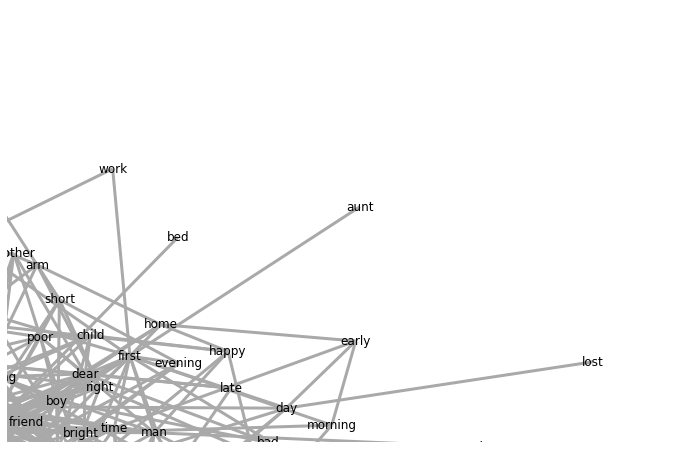

In [116]:
plt.figure(figsize=(12,8))
nx.draw_networkx_edges(H1, pos=pos, width=3, edge_color='darkgray')
colors = ['salmon', 'lightblue', 'green']

for community, color in zip(cumminities_cl_H1, colors):
    nx.draw_networkx_nodes(H1, pos=pos1, nodelist=cumminities_cl_H1, node_color=color, node_size=640)

nx.draw_networkx_labels(H1, pos=pos)

_ = plt.axis('off')

### Get the cliques for books graph - H2

In [120]:
c_h2 = list(nx.algorithms.community.k_clique_communities(H2, 3))

print("Graph H2 show {}-cliques\n\n {}".format(k,c_h2))


cummunities_cl_H2 =  [list(x) for x in c_h2]  # 3-clique communities books graph 

Graph H2 show 2-cliques

 [frozenset({'Fighting Back', 'Persecution', 'Bush Country', 'Give Me a Break', 'The Right Man', 'Bias', 'Betrayal', 'Slander', 'Shut Up and Sing', 'The French Betrayal of America', 'The Enemy Within', 'Arrogance', 'Why Courage Matters', 'Useful Idiots', 'Losing Bin Laden', "Rumsfeld's War", 'The Bushes', "The O'Reilly Factor", 'Endgame', 'Dangerous Dimplomacy', 'The Perfect Wife', 'Dereliction of Duty', 'Hating America', 'Breakdown', 'A National Party No More', 'Deliver Us from Evil', 'Power Plays', 'The Savage Nation', 'Hollywood Interrupted', 'The Official Handbook Vast Right Wing Conspiracy', 'Why America Slept', 'Ten Minutes from Normal', "Hillary's Scheme", 'Let Freedom Ring', 'Tales from the Left Coast', 'Things Worth Fighting For', 'The Death of Right and Wrong', 'Those Who Trespass', 'The Faith of George W Bush', "Who's Looking Out for You?", 'Legacy', 'Meant To Be', 'Off with Their Heads', 'The Real America', 'Spin Sisters', 'The Third Terrorist'}), f

### Plot 3-clique part of the graph for Books data -Graph H2

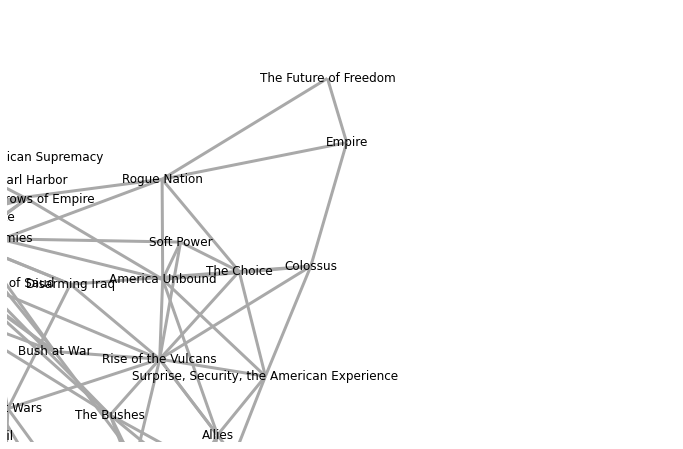

In [127]:
plt.figure(figsize=(12,8))
nx.draw_networkx_edges(H2, pos=pos2, width=3, edge_color='darkgray')
colors = ['salmon', 'lightblue', 'green']

for community, color in zip(cummunities_cl_H2, colors):
    nx.draw_networkx_nodes(H2, pos=pos2, nodelist=cummunities_cl_H2, node_color=color, node_size=640)

nx.draw_networkx_labels(H2, pos=pos2)

_ = plt.axis('off')

#### ---------------------------------------------------------------------------------------------------------------------------------------------

### B.| Maximize Modularity

In [196]:
c_h1_m = list(nx.algorithms.community.greedy_modularity_communities(H1))

print("Maximum Modularity on graph H1 \n\n",c_h1_m)



cummunities_gr_mod_h1 = [list(x) for x in c_h1_m]

print(cummunities_gr_mod_h1
     )

Maximum Modularity on graph H1 

 [frozenset({'bright', 'pretty', 'round', 'room', 'long', 'part', 'usual', 'eye', 'good', 'arm', 'dark', 'red', 'black', 'door', 'small', 'letter', 'large', 'head', 'beautiful', 'great', 'hope', 'fire', 'open', 'hand', 'night', 'strong'}), frozenset({'thing', 'certain', 'man', 'agreeable', 'life', 'white', 'morning', 'aunt', 'common', 'money', 'moment', 'first', 'best', 'alone', 'old', 'lost', 'love', 'time', 'name', 'day', 'happy', 'early', 'year', 'person'}), frozenset({'word', 'bed', 'better', 'state', 'woman', 'quiet', 'same', 'place', 'voice', 'low', 'right', 'mind', 'true', 'little', 'miserable', 'ready', 'home'}), frozenset({'pleasant', 'other', 'whole', 'world', 'general', 'light', 'course', 'house', 'short', 'natural', 'way', 'fancy', 'side', 'family', 'manner', 'evening', 'anything'}), frozenset({'friend', 'late', 'boy', 'air', 'kind', 'dear', 'young', 'thought', 'child', 'mother', 'possible', 'poor', 'greater', 'bad'}), frozenset({'face', 'ha

### Plot H1 graph  with greedy modularity

TypeError: unhashable type: 'list'

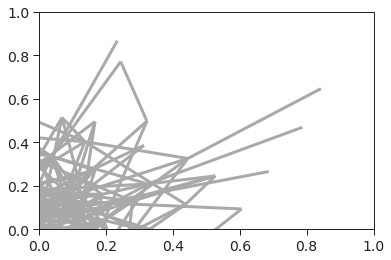

In [139]:
nx.draw_networkx_edges(H1, pos=pos1, width=3, edge_color='darkgray')
colors = ['salmon', 'lightblue', 'green']

for community, color in zip(cummunities_gr_mod_h1, colors):
    nx.draw_networkx_nodes(H1, pos=pos1, nodelist=cummunities_gr_mod_h1, node_color=color, node_size=640)

nx.draw_networkx_labels(H1, pos=pos1)

_ = plt.axis('off')

### Graph H1 -adjnoouns modularity using Louvain

<class 'dict'>

Cluster1 ['beautiful', 'black', 'letter', 'room', 'eye', 'dark', 'night', 'fire', 'great', 'work', 'long', 'hard', 'red', 'large', 'white', 'strong', 'usual'] 
@Cluster2['agreeable', 'man', 'old', 'person', 'anything', 'short', 'arm', 'round', 'aunt', 'first', 'bad', 'air', 'boy', 'face', 'little', 'young', 'best', 'course', 'friend', 'love', 'part', 'thing', 'time', 'way', 'better', 'heart', 'mind', 'place', 'right', 'state', 'woman', 'word', 'door', 'bright', 'evening', 'morning', 'certain', 'day', 'other', 'child', 'happy', 'common', 'kind', 'dear', 'good', 'home', 'mother', 'pretty', 'open', 'early', 'full', 'master', 'moment', 'general', 'fancy', 'voice', 'head', 'hope', 'greater', 'hand', 'life', 'glad', 'new', 'late', 'whole', 'light', 'manner', 'bed', 'house', 'low', 'money', 'ready', 'small', 'strange', 'thought', 'lost', 'alone', 'nothing', 'miserable', 'natural', 'half', 'wrong', 'name', 'pleasant', 'possible', 'side', 'perfect', 'poor', 'quiet', 'same', 'som

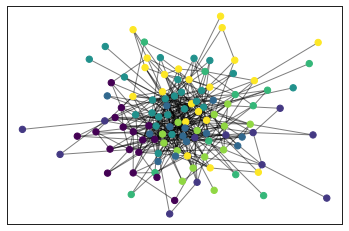

In [221]:
### Use Louvain method for modularity

# compute the best partition
partition = community_louvain.best_partition(H1)
print(type(partition))

# cum_Louv_h1 = [ list(x) for x in partition]

l1,l2 = [],[]
for k,v in partition.items():
    if v==0:
        l1.append(k)
    else:
        l2.append(k)

print('\nCluster1 {} \n@Cluster2{}'.format(l1,l2))

cummunitiesLouv_H1_list = [l1,l2] # list of list to calculate modularity later
        
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(H1, pos1, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(H1, pos1, alpha=0.5)
plt.show()

### Max modularity communities for graph H2 -books


 a=  ['1000 Years for Revenge', 'Bush vs. the Beltway', "Charlie Wilson's War", 'Sleeping With the Devil', 'The Man Who Warned America', 'Why America Slept', 'Ghost Wars', 'Dangerous Dimplomacy'] 
 b= ['Losing Bin Laden', 'A National Party No More', 'Bush Country', 'Dereliction of Duty', 'Legacy', 'Off with Their Heads', 'Persecution', "Rumsfeld's War", 'Breakdown', 'Betrayal', 'Shut Up and Sing', 'Meant To Be', 'The Right Man', 'Ten Minutes from Normal', "Hillary's Scheme", 'The French Betrayal of America', 'Tales from the Left Coast', 'Hating America', 'The Third Terrorist', 'Endgame', 'Spin Sisters', 'The Death of Right and Wrong', 'Useful Idiots', "The O'Reilly Factor", 'Let Freedom Ring', 'Those Who Trespass', 'Bias', 'Slander', 'The Savage Nation', 'Deliver Us from Evil', 'Give Me a Break', 'The Enemy Within', 'The Real America', "Who's Looking Out for You?", 'The Official Handbook Vast Right Wing Conspiracy', 'Power Plays', 'Arrogance', 'The Perfect Wife', 'The Bushes', 'Things

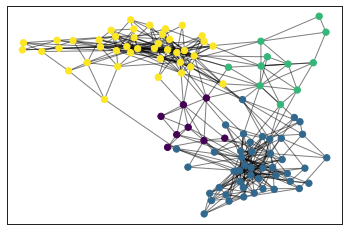

In [215]:
### Use Louvain method for modularity

# compute the best partition
partition2 = community_louvain.best_partition(H2)

# cum_Louv_h2= [ list(x) for x in partition2]

# print(partition2)

# print('\n',cum_Louv_h2)
a,b,c = [],[],[]
for key, value in partition2.items():
    if value == 0:
        a.append(key)
    elif value==1:
        b.append(key)
    else:
        c.append(key)
        
print("\n a= ",a,"\n b=",b,"\n c=",c)

cummunititesLouv_H2_list = [a,b,c]

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition2.values()) + 1)
nx.draw_networkx_nodes(H2, pos2, partition2.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition2.values()))
nx.draw_networkx_edges(H2, pos2, alpha=0.5)
plt.show()

## C.|Hierarchical clustering  girvan newman 

### for graph H1

In [150]:
communities1, removed_edges1 = girvan_newman(H1)
# Edges that were NOT removed by GN algorithm
other_edges1 = set(H1.edges()) - set(removed_edges1)

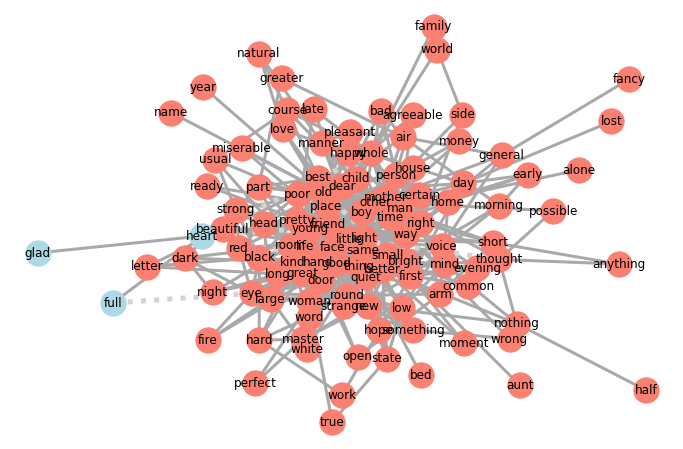

In [151]:
plt.figure(figsize=(12,8))
# plot edges, with edges removed by algorithm dashed instead of solid
nx.draw_networkx_edges(H1, pos1, width=3, edge_color='darkgray', edgelist=other_edges1)
nx.draw_networkx_edges(H1, pos1, edgelist=removed_edges1, style='dotted', edge_color='lightgray', width=5)
for community, color in zip(communities1, colors):
    nx.draw_networkx_nodes(H1, pos=pos1, nodelist=community, node_color=color, node_size=640)
nx.draw_networkx_labels(H1, pos=pos1)
_ = plt.axis('off')

### For graph H2 - girvan_newman

In [153]:
communities2, removed_edges2 = girvan_newman(H2)
# Edges that were NOT removed by GN algorithm
other_edges2 = set(H2.edges()) - set(removed_edges2)

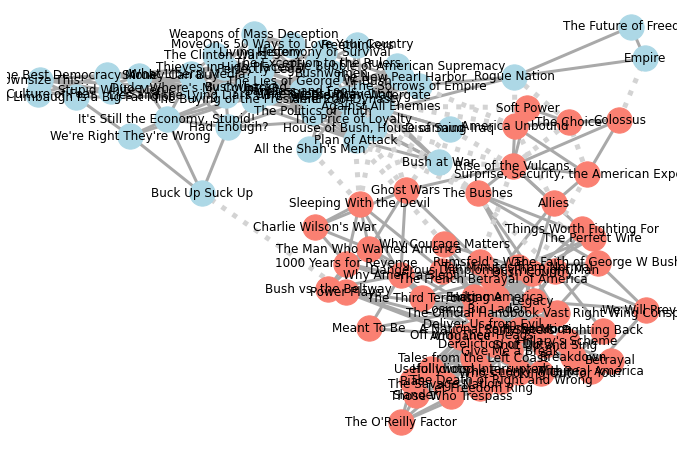

In [155]:
plt.figure(figsize=(12,8))
# plot edges, with edges removed by algorithm dashed instead of solid
nx.draw_networkx_edges(H2, pos2, width=3, edge_color='darkgray', edgelist=other_edges2)
nx.draw_networkx_edges(H2, pos2, edgelist=removed_edges2, style='dotted', edge_color='lightgray', width=5)
for community, color in zip(communities2, colors):
    nx.draw_networkx_nodes(H2, pos=pos2, nodelist=community, node_color=color, node_size=640)
nx.draw_networkx_labels(H2, pos=pos2)
_ = plt.axis('off')

### d. | Spectral Clustering 

In [204]:
# Get adjacency-matrix as numpy-array
adj_mat1 = nx.to_numpy_matrix(H1)
adj_mat2 = nx.to_numpy_matrix(H2)


# Cluster
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(adj_mat1)

sc2 = SpectralClustering(3, affinity='precomputed', n_init=100)
sc2.fit(adj_mat2)

# Compare ground-truth and clustering-results
print('\nAdjnoun H1-spectral clustering')
print(sc.labels_)
print('\njust for better-visualization: invert clusters (permutation)')
print(np.abs(sc.labels_ - 1))


# Compare ground-truth and clustering-results -- graph H2 3 cluster books
print('\nBooks H2spectral clustering')
print(sc2.labels_)
print('\njust for better-visualization: invert clusters (permutation)')
print(np.abs(sc2.labels_ - 1))


Adjnoun H1-spectral clustering
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1
 0]

just for better-visualization: invert clusters (permutation)
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0
 1]

Books H2spectral clustering
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 1 1 1 1 1 2 2 1 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2]

just for better-visualization: invert clusters (permutation)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0

### B.| Measures

#### v. Modularity Measures

##### For Graph H1

In [222]:
Q1_1 = nx.algorithms.community.modularity(H1,cummunities_gr_mod_h1) # greedy modularity graph1
Q1_2 = modularity(H1,cummunitiesLouv_H1_list)
Q1_3 = nx.algorithms.community.modularity(H1,communities1)


print("Modularity for graph1 using: \n greedy method ={}, ,\nusing Louvain {}, \n using girvan-newman {}".format(Q1_1,Q1_2,Q1_3))

Modularity for graph1 using: 
 greedy method =0.29469619377162637, ,
using Louvain 0.09459100346020617, 
 using girvan-newman 0.009234602076124521


##### For graph H2

In [218]:
Q2_1 = modularity(H2,cummunities_gr_mod_h2) # greedy modularity graph2
Q2_3 = modularity(H2,communities2)
Q2_2 = modularity(H2,cummunititesLouv_H2_list)

print("Modularity for graph2 using greedy method ={} ,\nusing Louvain {},\nusing girvan-newman {}".format(Q2_1,Q2_2,Q2_3))

Modularity for graph2 using greedy method =0.5019744859395165 ,
using Louvain 0.48447149078832974,
using girvan-newman 0.4428915935232932


## Part B

In [225]:
### Generate random model
n = 500
m = 250
p = 0.2



Gpow = nx.generators.random_graphs.powerlaw_cluster_graph(n, m, p)

communities_Gpow = community_louvain.best_partition(Gpow)

clusters_id = set(communities_Gpow)

print("\n $Different Clusters/Groups of keys/IDs ",clusters_id)

print("\nAlls cummunities data",communities_Gpow)



 $Different Clusters/Groups of keys/IDs  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 21

In [235]:


## Group dictionary structure of the graph by values,
## So each value maps to a list of different keys

grouped_dict = defaultdict(list)
for key, val in sorted(communities_Gpow.items()):
    grouped_dict[val].append(key)
print("\n**Grouped dictionary is : " + str(dict(grouped_dict)))

print("\n\n##,type= ",type(grouped_dict.values()),grouped_dict.values())
cummunities_l_pow = []   
for vv in grouped_dict.values():
    cummunities_l_pow.append(vv)

print("\n**List of grouped-keys'list ",cummunities_l_pow)


**Grouped dictionary is : {2: [0, 8, 17, 18, 34, 38, 43, 48, 57, 58, 59, 65, 75, 80, 86, 90, 91, 96, 137, 138, 157, 164, 177, 195, 197, 203, 209, 223, 224, 235, 242, 243, 244, 257, 259, 271, 272, 276, 280, 281, 292, 320, 331, 332, 340, 348, 353, 363, 374, 388, 389, 391, 393, 400, 401, 406, 437, 451, 464, 472, 486, 487, 492, 493, 494, 499], 1: [1, 7, 12, 13, 25, 44, 47, 50, 52, 62, 66, 71, 77, 87, 97, 103, 105, 106, 113, 120, 123, 124, 126, 134, 144, 148, 156, 167, 168, 173, 176, 181, 182, 183, 184, 185, 198, 212, 213, 214, 217, 221, 225, 226, 232, 238, 240, 246, 247, 269, 270, 278, 279, 285, 287, 289, 290, 294, 301, 306, 307, 309, 313, 315, 316, 319, 322, 324, 325, 328, 341, 367, 373, 375, 385, 396, 405, 409, 411, 413, 414, 416, 422, 426, 428, 429, 431, 434, 443, 444, 447, 452, 455, 457, 479, 483, 485, 490], 3: [2, 6, 31, 33, 35, 41, 49, 54, 60, 69, 79, 93, 102, 119, 129, 131, 132, 135, 136, 139, 142, 153, 171, 178, 179, 192, 194, 200, 227, 228, 234, 237, 250, 254, 258, 260, 283, 297,

#### Plot Gpow graph 

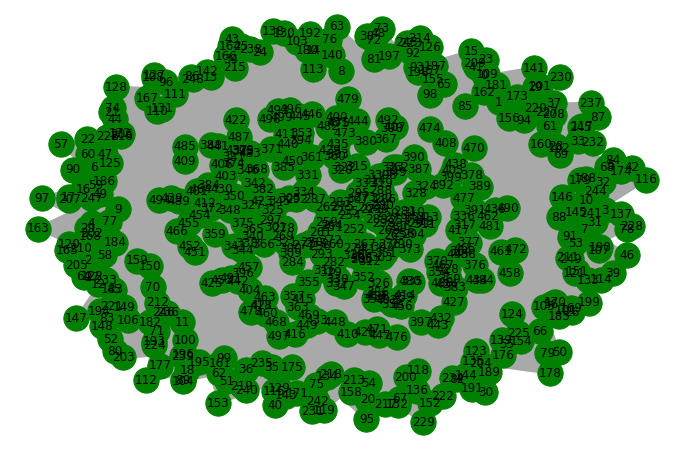

In [226]:
posGpow = nx.spring_layout(Gpow)

plt.figure(figsize=(12,8))
nx.draw_networkx(Gpow, pos=posGpow, node_color='green', edge_color='darkgray', width=3, node_size=640)
limits = plt.axis('off')

In [237]:
mod = modularity(Gpow,cummunities_l_pow)
print("\n Modularity of Gpow graph, communities with Louvain method",mod)


 Modularity of Gpow graph, communities with Louvain method 0.027635665795158124
